# Project Title: Descriptive Statistical Analysis of Leukemia Disease



make a full profile from leukemia data. This data contain clinics caractheristic, life style, environment, and leukemia status positve or negative.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

### Load data

In [2]:
df = pd.read_csv('../../data/biased_leukemia_dataset.csv')

In [3]:
df.head()

,Patient_ID,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,Family_History,Smoking_Status,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
0,1,52,Male,China,2698,5.36,262493,12.2,72,Yes,No,Yes,No,No,No,24.0,No,No,Ethnic_Group_B,Low,Rural,Negative
1,2,15,Female,China,4857,4.81,277877,11.9,97,Yes,No,No,No,No,No,28.7,No,No,Ethnic_Group_A,Low,Urban,Positive
2,3,72,Male,France,9614,5.17,319600,13.4,94,No,Yes,No,Yes,No,No,27.7,No,No,Ethnic_Group_B,Low,Urban,Negative
3,4,61,Male,Brazil,6278,5.41,215200,11.6,50,No,No,Yes,No,No,No,31.6,No,No,Ethnic_Group_A,Medium,Rural,Negative
4,5,21,Male,Brazil,8342,4.78,309169,14.3,28,No,No,Yes,No,No,No,22.3,No,No,Ethnic_Group_B,Low,Rural,Negative


### Data Cleaning

In [4]:
# check missing values
display(df.isnull().sum())

Patient_ID              0
Age                     0
Gender                  0
Country                 0
WBC_Count               0
RBC_Count               0
Platelet_Count          0
Hemoglobin_Level        0
Bone_Marrow_Blasts      0
Genetic_Mutation        0
Family_History          0
Smoking_Status          0
Alcohol_Consumption     0
Radiation_Exposure      0
Infection_History       0
BMI                     0
Chronic_Illness         0
Immune_Disorders        0
Ethnicity               0
Socioeconomic_Status    0
Urban_Rural             0
Leukemia_Status         0
dtype: int64

There no missing values

In [5]:
# check duplicated data
display(f"Jumlah duplicate data: {df.duplicated().sum()}")

'Jumlah duplicate data: 0'

In [6]:
# search negatif values in WBC_Count
negative_values = df[df['WBC_Count'] < 0]['WBC_Count']
count_negative_values = df[df['WBC_Count'] < 0]['WBC_Count'].count()

if not negative_values.empty:
    print(f"total count 'WBC_Count' column: \n{count_negative_values}")
    print(f"Count negative value in column 'WBC_Count': \n{negative_values}")
else:
    print("There's no negative value in 'BMI' column")

total count 'WBC_Count' column: 
23
Count negative value in column 'WBC_Count': 
7579      -492
16642    -1602
23335      -96
27593     -453
28880      -83
29429     -242
31428    -1415
35422     -313
65493      -96
73116     -959
76635     -649
78880     -827
88541     -306
97653      -10
100352     -58
105489    -605
106353    -314
116142     -46
117864    -672
118977   -1484
119275     -74
123617    -340
133167     -22
Name: WBC_Count, dtype: int64


There are 23 data that contain negative value from `WBC_Count`.

- Investigate `BMI` column

In [7]:
negative_values = df[df['BMI'] <= 18.5]['BMI']
count_negative_values = len(df[df['BMI'] < 18.5])

if not negative_values.empty:
    print(f"total count BMI score under standard: \n{count_negative_values}")
    print(f"Count under standard value MBI score: \n{negative_values}")
else:
    print("There's now under standard score in 'BMI' column")

total count BMI score under standard: 
13595
Count under standard value MBI score: 
15        18.5
36        12.9
46        18.0
48        17.0
51        17.5
          ... 
143138    15.7
143175    17.7
143178    17.4
143179    18.0
143188    16.0
Name: BMI, Length: 14074, dtype: float64


There are 13.595 BMI score data, of which 10% contain substandard BMI scores.

However, for now, save the data first, and then check further.

Make a boxplot for `BMI` column.

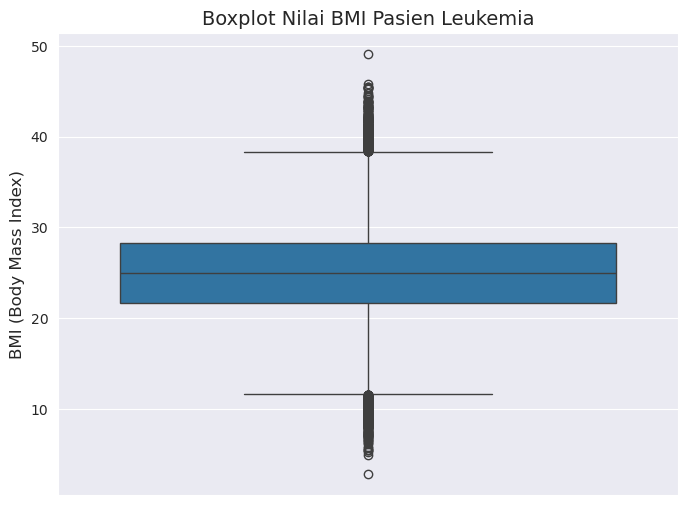

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['BMI']) 
plt.title('Boxplot Nilai BMI Pasien Leukemia', fontsize=14)
plt.ylabel('BMI (Body Mass Index)', fontsize=12)
plt.show()

Insight:

- There is a lot of data with `BMI` below the normal standard (Underweight), and some are even extreme low.

- The main problem is low `BMI`, not high: Low `BMI` outliers are much more numerous and extreme than high `BMI` outliers. This shows that the problem of extreme values in `BMI` is more dominant towards low, not high.

- `BMI` distribution is quite wide, but tends to be symmetrical around the mean: The distribution of the middle 50% of `BMI` data is quite wide, but in general the distribution tends to be symmetrical around the median. The upper whiskers are slightly longer than the lower, but the low outliers are the main problem.

### Descriptive Analysis Statistics

#### Descriptive statistic numerical columns

In [9]:
# describe data
df.describe()

,Patient_ID,Age,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,BMI
count,143194.00000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000
mean,71597.50000,44.945200,7001.289879,4.998193,249933.012137,13.498334,49.547984,24.990679
std,41336.69156,25.737805,2007.444410,0.500298,49842.308243,1.996714,28.837607,4.999786
min,1.00000,1.000000,-1602.000000,2.940000,46069.000000,4.700000,0.000000,2.800000
25%,35799.25000,23.000000,5644.250000,4.660000,216372.000000,12.100000,25.000000,21.600000
50%,71597.50000,45.000000,7007.000000,5.000000,250248.500000,13.500000,50.000000,25.000000
75%,107395.75000,67.000000,8352.000000,5.340000,283603.500000,14.800000,75.000000,28.300000
max,143194.00000,89.000000,15586.000000,7.150000,460325.000000,22.200000,99.000000,49.100000


Insight:

---

- No missing value in all column.

- `mean` patient age : 49 year old.

- `std` (Standard Deviation) patient age: 25.7 year old.

- `min` patient age: 1 year old.

- `Q1 (25%)` age patient under or equal with **Q1** is :23 year old.

- `Q2 (50%) - Median` half patient age under or equal with median value (**Q2**) is: 45 year old.

- `Q3 75%)` age patient under or equal **Q3** is : 67 year old.

- `max` patient age is: 89 year old

So, according to my insight, the average age of patients diagnosed with leukemia is mostly 49 years old, and the median age of people who contract leukemia is 25.7 years old.

#### Descriptive statistic categorical columns

In [10]:
#  Identifikasi kolom kategorikal
column_categorical = []
for column in df.columns:
    dtype = df[column].dtype
    if pd.api.types.is_object_dtype(dtype) or isinstance(dtype, pd.CategoricalDtype):
        column_categorical.append(column)

#  Identifikasi kolom numerical
numerical_column = []
for column in df.columns:
    dtype = df[column].dtype
    if pd.api.types.is_numeric_dtype(dtype) or isinstance(dtype, pd.CategoricalDtype):
        numerical_column.append(column)

# Hitung nilai unik untuk setiap kolom kategorikal
frequency = {}
percentage = {}
for column in column_categorical:
    frequency[column] = df[column].value_counts()
    percentage[column] = df[column].value_counts(normalize=True) * 100

In [11]:
# print the result
for column in column_categorical:
    freq = frequency[column]
    pct = percentage[column]
    
    formatted_freq = ""
    for index, value in freq.items():
        formatted_freq += f"{index} : {value}<br>"

    formatted_pct = ""
    for index, value in pct.items():
        formatted_pct += f"{index} : {value:.1f}%<br>" # Format setiap nilai di sini

    display(HTML(f"Kolom: {column}"))
    display(HTML(f"Frequency:<br>{formatted_freq}"))
    display(HTML(f"Percentage:<br>{formatted_pct}"))
    print("-" * 50)

--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


--------------------------------------------------


Insight

---
- Gender:  The dataset is skewed towards males, comprising 59.9% of the population, while females make up 40.1%.

- Country: The data originates predominantly from India (16.1%) and the USA (15.9%), followed by Brazil, Russia, and China, each contributing approximately 10.6%.  Other countries represent a significantly smaller portion (around 2%).

- Genetic Mutation:  A large majority (80.1%) of the individuals in the dataset do not have a recorded genetic mutation, while 19.9% do.

- Family History:  Nearly 70% of the individuals have no family history of the condition being studied, while approximately 30% do.

- Smoking Status: Similar to gender distribution, the dataset shows a higher proportion of non-smokers (59.9%) compared to smokers (40.1%).

- Alcohol Consumption:  70% of the individuals report no alcohol consumption, while 30% do.

- Radiation Exposure:  Radiation exposure is relatively low, with only 10.1% reporting exposure, and 89.9% reporting no exposure.

- Infection History:  A quarter (25%) of the individuals have a history of infections, while the majority (75%) do not.

- Chronic Illness:  34.9% of the individuals have a chronic illness, while 65.1% do not.

- Immune Disorders:  14.9% of the individuals have immune disorders, compared to 85.1% who do not.

- Ethnicity:  Ethnic Group A makes up the largest portion of the dataset (50.2%), followed by Ethnic Group B (29.9%) and Ethnic Group C (19.9%).

- Socioeconomic Status:  The dataset is comprised of 49.8% individuals with low socioeconomic status, 40.2% with medium status, and 10% with high status.

- Urban/Rural:  The data is predominantly from urban areas (70.1%), with only 29.9% from rural areas.

- Leukemia Status: The vast majority (85.1%) of the individuals tested negative for leukemia, while 14.9% tested positive.

### Visualizations

Make histplot, barchart, boxplot.

#### Histogram Chart Numerical Columns

Histogram chart distribution for numerical columns.

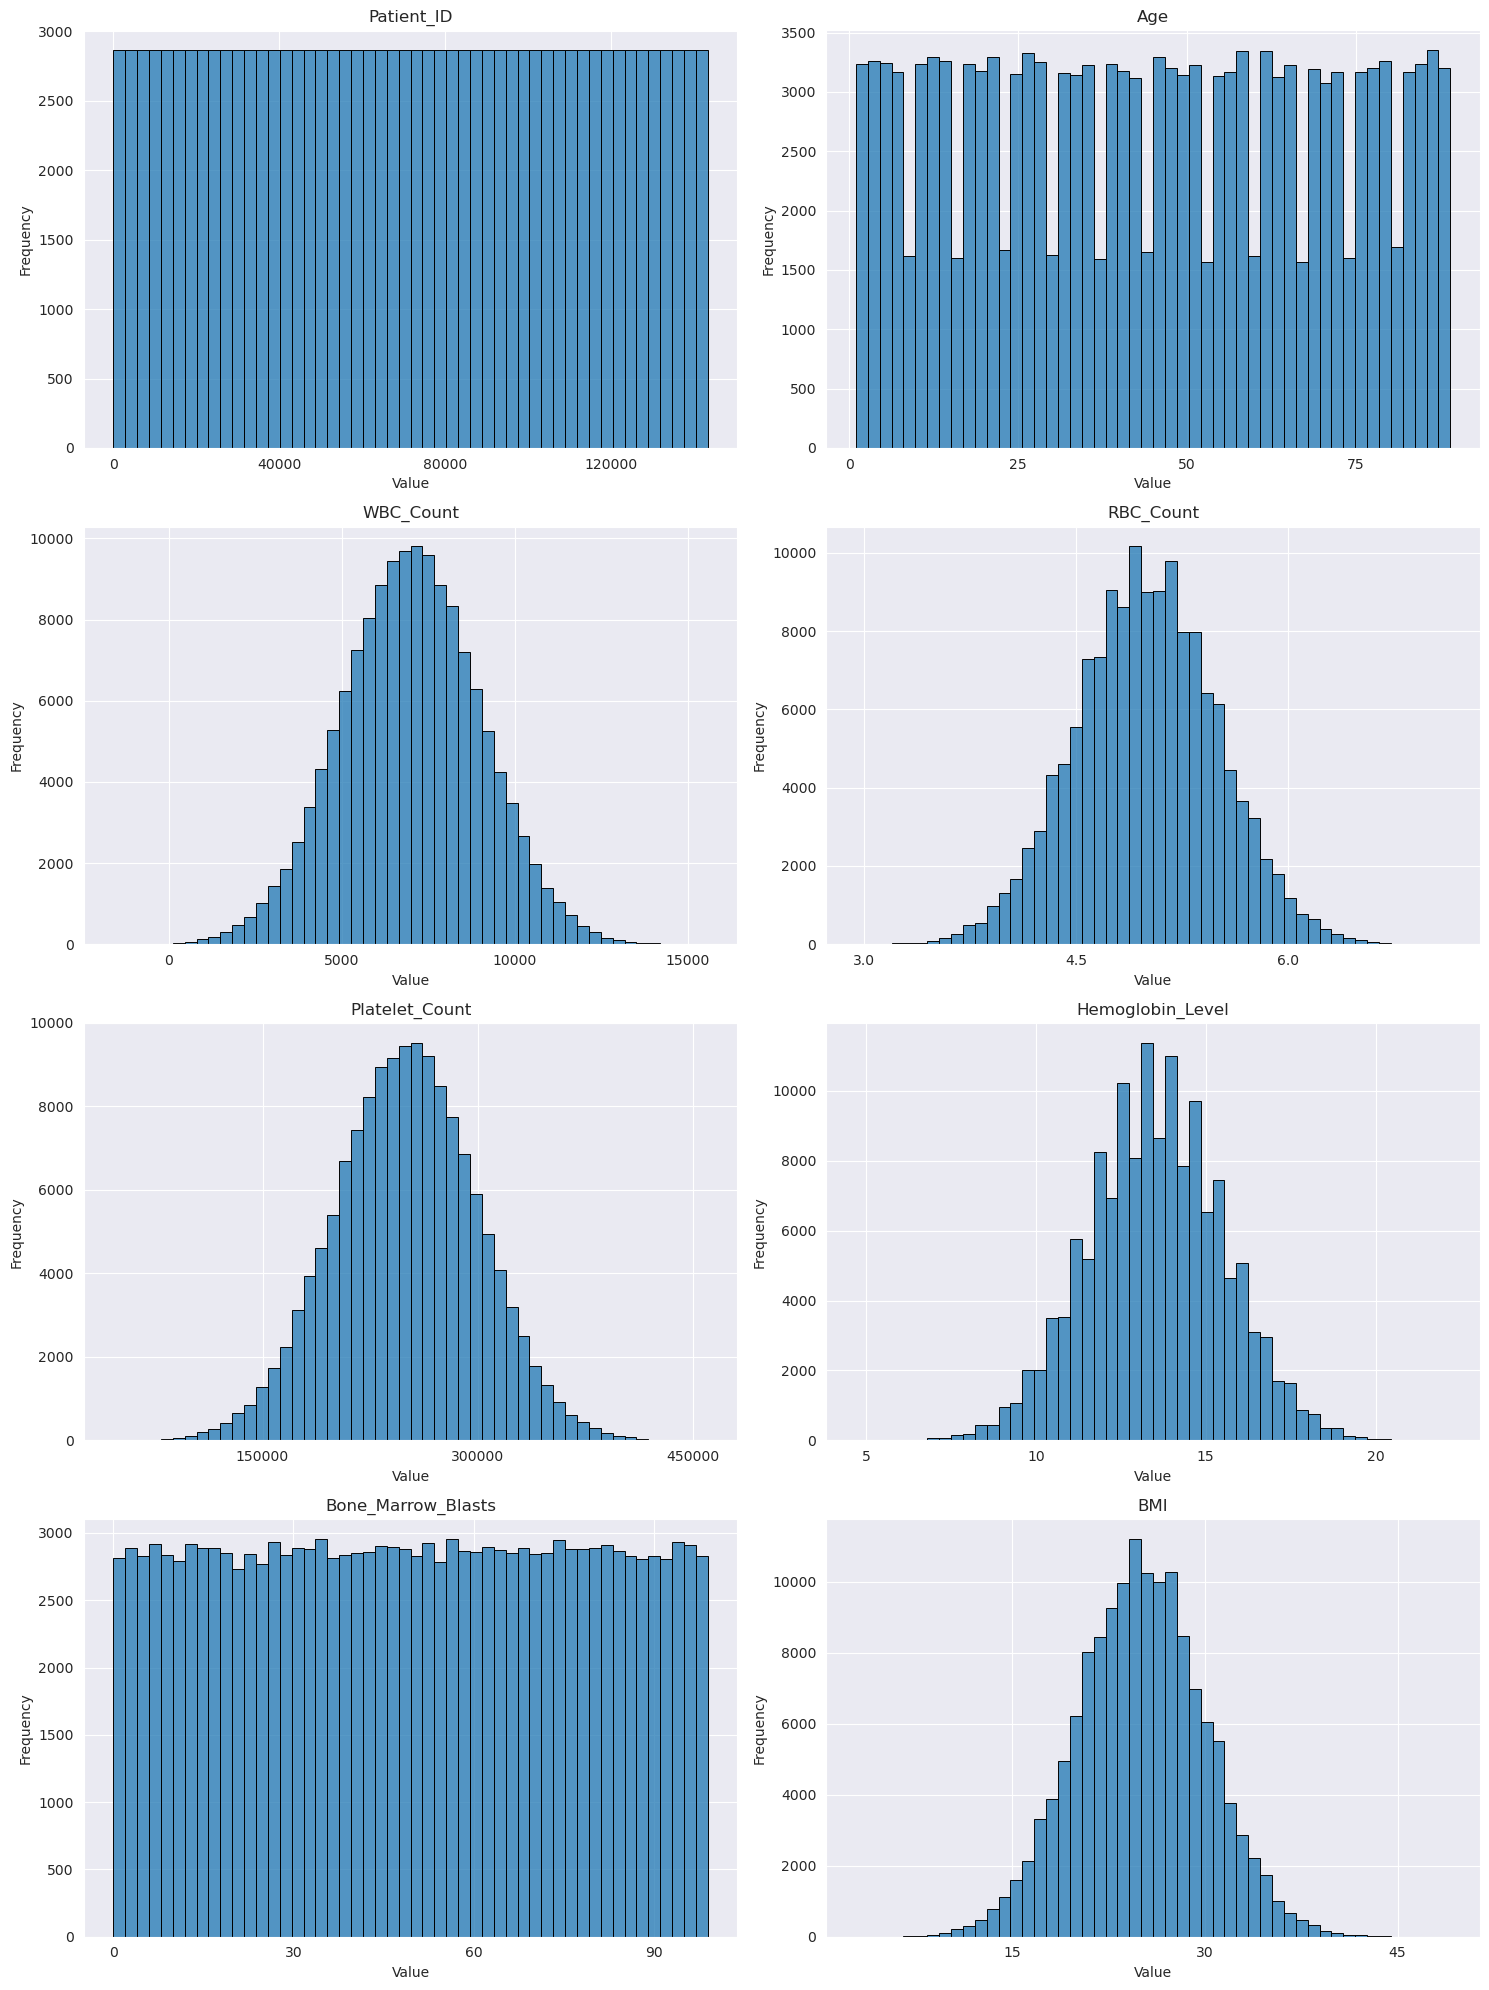

In [ ]:
# Ini rows and cols for chart
n_plots = len(numerical_column)
n_cols = 2 
n_rows = (n_plots + n_cols - 1) // n_cols 


# Make subplots & flatten axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Iterate & make histogram
for i, column in enumerate(numerical_column):
    ax = axes[i]
    sns.histplot(df[column], bins=50, edgecolor='black', ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))

# Hide empty subplot 
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Revalidation `Age` column to know is there gap in histogram

Group frequency age (per 5 year old): 
Age
0-4      6494
5-9      8024
10-14    8109
15-19    8122
20-24    8068
25-29    8188
30-34    7926
35-39    8053
40-44    7939
45-49    8044
50-54    7965
55-59    8070
60-64    8087
65-69    7986
70-74    7836
75-79    7989
80-84    8157
85-89    8137
Name: count, dtype: int64


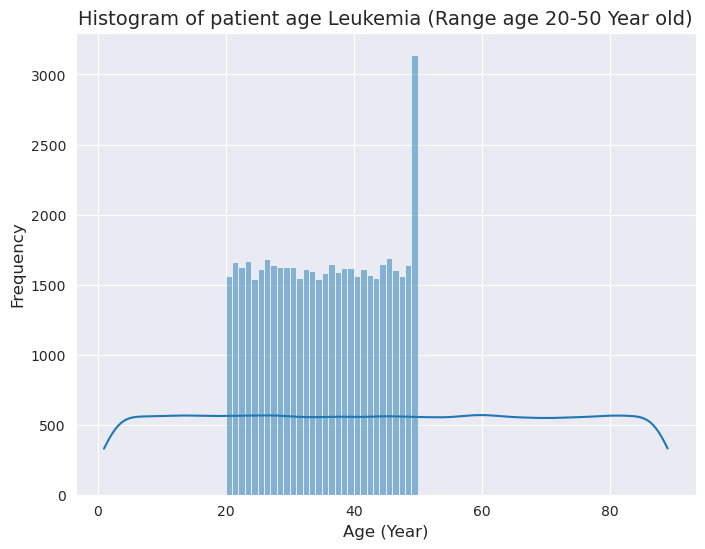

In [13]:
bins_age = list(range(0, 95, 5))
labels_age = [f'{i}-{i+4}' for i in bins_age[:-1]]

age_category = pd.cut(df['Age'], bins=bins_age, right=False, labels=labels_age) # make category column age
age_frequency = age_category.value_counts().sort_index() # count freq column age, sorting it

print(f"Group frequency age (per 5 year old): \n{age_frequency}")

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=30, binrange=(20, 50))
plt.title('Histogram of patient age Leukemia (Range age 20-50 Year old)', fontsize=14)
plt.xlabel('Age (Year)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Insight**

---

- Patient_ID:
    The distribution is very flat, almost uniform. This is natural, Patient_ID is just a patient sequence number, no special distribution pattern is expected. In essence, these patient IDs are random, with no particular bias or tendency.

- Age:
   The distribution is relatively equal, but there is a subtle drop in frequency around 45-50 years of age, especially at the end of the 20-50 years age range histogram. The 5-year frequency table does not show a significant “gap” around the 40s. The decreased frequencies in the histogram may be due to visual effects or subtle fluctuations. Further investigation is warranted, but for the initial descriptive analysis, this is not a major anomaly. The general age distribution of patients remains broad from children to the elderly.

- WBC_Count:
    The distribution is right-skewed. Most patient's `WBC_Count` is low-medium, a small proportion is high. Negative value anomalies are noteworthy.

- RBC_Count:
    Normal-like (bell-shaped) distribution. `RBC_Count` values tend to cluster around the average.

- Platelet_Count:
    The distribution is right-skewed, similar to WBC_Count. Most patient's `Platelet_Count` is low-medium, a small proportion is high.

- Hemoglobin_Level:
    Normal-like (bell-shaped) distribution. `Hemoglobin_Level` values tend to cluster around the average.

- Bone_Marrow_Blast:
    The distribution is relatively similar. The percentage of `bone_marrow_blasts` varied between patients. Further medical context is needed.

- BMI (Body Mass Index):
    Normal-like (bell-shaped) distribution. `BMI` values tend to cluster around the average. The anomaly of extreme low `BMI` values is worth noticing.

#### Boxplot Numerical Columns vs Leukemia Status

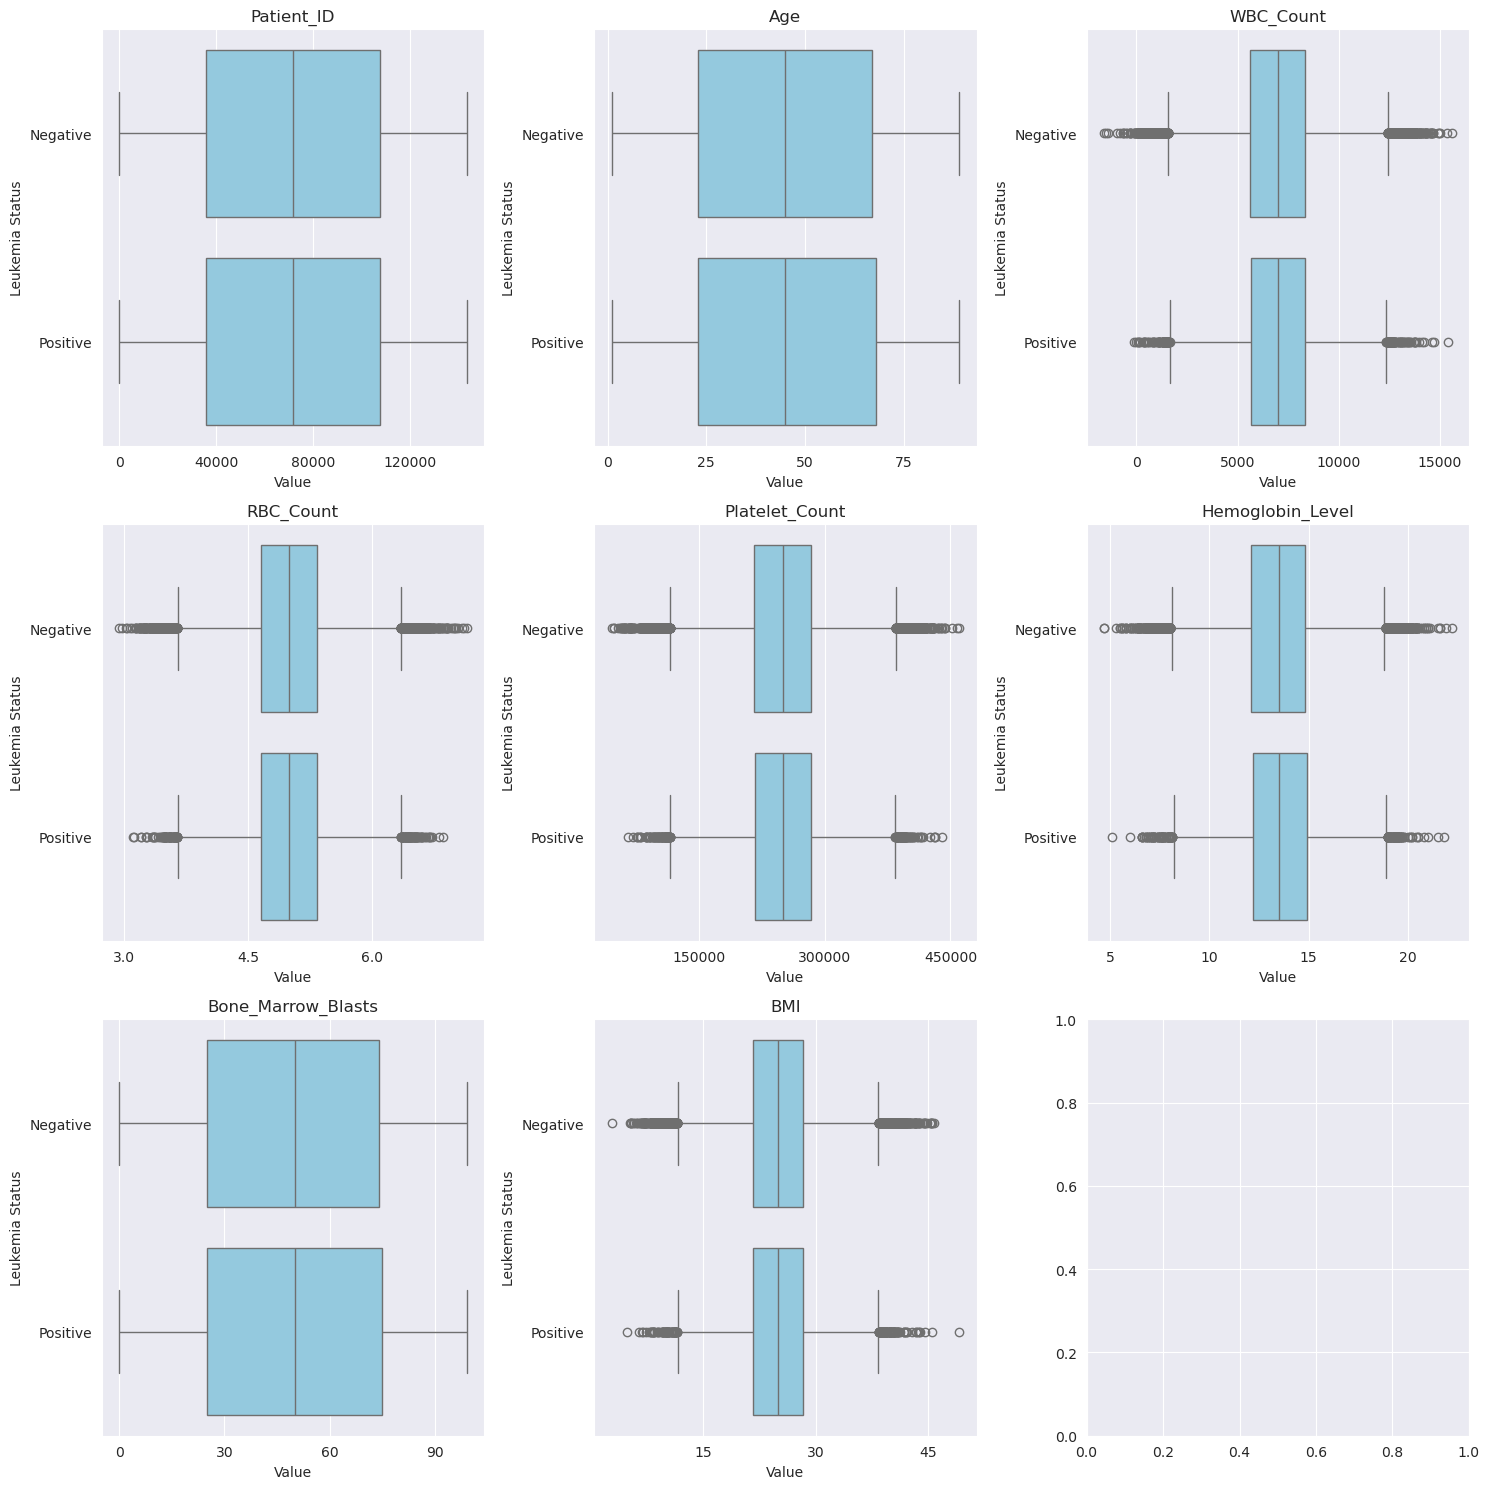

In [14]:
# Ini rows and cols for chart
n_plots = len(numerical_column)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols 

# Make subplots & flatten axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

if n_rows == 1:
    axes = axes.reshape(-1)
elif n_plots < n_rows * n_cols:
    axes = axes.flatten()[:n_plots]
else:
    axes = axes.flatten()

# Iterate & make histogram
for i, column in enumerate(numerical_column):
    ax = axes[i]
    sns.boxplot(x=df[column], y=df['Leukemia_Status'], ax=ax, color="skyblue")  # Boxplot
    # sns.swarmplot(x=df[column], y=df['Leukemia_Status'], ax=ax, color="darkgreen")  # Swarm plot/
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Leukemia Status')
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))

# Hide empty subplot 
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insight:

- `Patient_ID`: distribution between the 'Negative' and 'Positive' groups is almost **IDENTICAL**. The squares, medians and whiskers are super similar. This is totally normal! Patient_ID is just the patient's serial number, it has NOTHING to do with leukemia status. This boxplot is just a sanity check, showing that patient ID is random and not biased towards leukemia status.

- `Age`: The Age distribution between the 'Negative' and 'Positive' groups is **ALSO VERY MIXED**. The squares, medians and whiskers are almost exactly the same. This shows that AGE is likely **NOT A SIGNIFICANT DIFFERENT FACTOR** between positive and negative leukemia patients in this dataset. The average age and distribution of age between positive and negative leukemia patients are almost the same.

- `WBC_Count`: WBC_Count has the potential to be a powerful indicator of leukemia status! A high value of WBC_Count is very likely to be associated with a positive leukemia status. This is very relevant medically, as one of the characteristics of leukemia is an abnormally high white blood cell count.

- `RBC_Count`: RBC_Count has the potential to be an **INDICATOR OF LEUKEMIA STATUS DIFFERENCE**, BUT NOT AS STRONG AS `WBC_COUNT`. Leukemia positive patients tend to have a slightly lower RBC_Count, but the difference is not as extreme as WBC_Count. This is also medically relevant, as anemia (lack of red blood cells) can be a symptom of leukemia.

- `Platelet_Count`: Platelet_count might be a very weak or even non-significant indicator of **LEUKEMIA STATUS difference**. There may be a slight tendency for Platelet_Count to be lower in the positive group, but the difference is too small and not visually consistent.

- `Hemoglobin_Level`: Hemoglobin_Level PROBABLY IS **NOT A SIGNIFICANT INDICATOR OF LEUKEMIA STATUS**. There may be a slight tendency for Hemoglobin_Level to be lower in the positive group, but the difference is VERY MINIMUM and NOT visually SIGNIFICANT.

- `Bone_Marrow_Blasts`: BONE_MARROW_BLASTS IS THE **STRONGEST AND CLEAREST LEUKEMIA STATUS INDICATOR**. A high bone marrow blast percentage is very, very strongly associated with a positive leukemia status. This is VERY RELEVANT medically, as an increase in blast cells in the bone marrow is the main hallmark of leukemia!

---

- **STRONGEST LEUKEMIA STATUS DIFFERENCE INDICATORS**: `WBC_COUNT` and `BONE_MARROW_BLASTS`.

- **A WEAKER INDICATOR OF LEUKEMIA STATUS**: `RBC_COUNT` and Probably `BMI`.

- `Platelet_Count` and `Hemoglobin_Level`: PROBABLY NOT AN INDICATOR OF A SIGNIFICANT LEUKEMIA STATUS DIFFERENCE.

#### Bar Chart Categorical Columns

Bar chart for visualize categorical column.

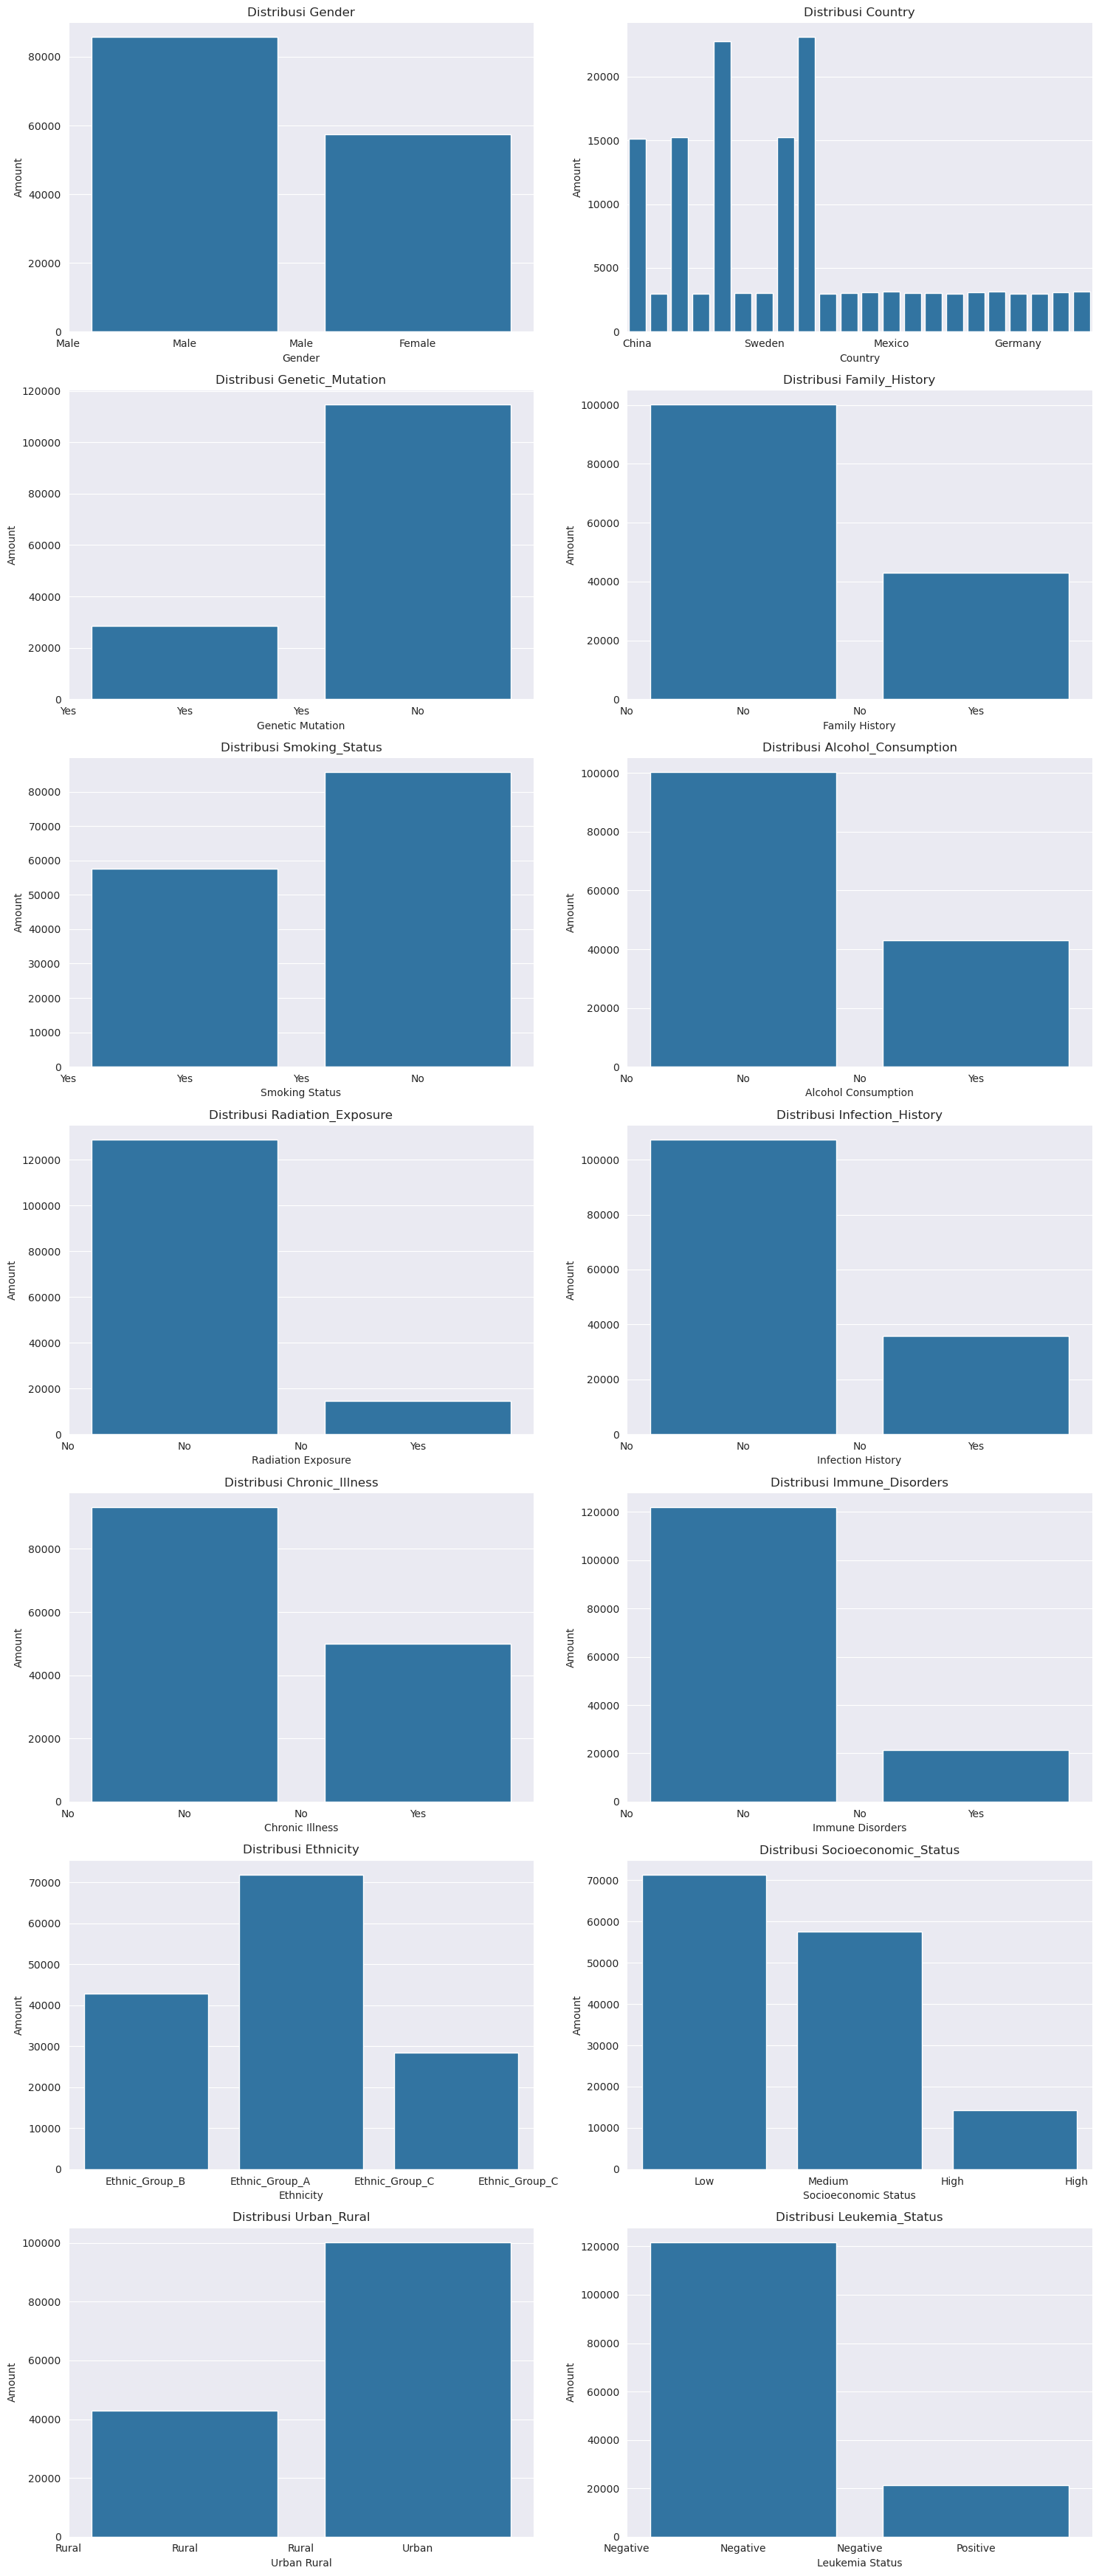

In [15]:
n_plots = len(column_categorical)
n_cols = 2 
n_rows = (n_plots + n_cols - 1) // n_cols 

# Make subplots & flatten axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Iterate & make histogram
for i, column in enumerate(column_categorical):
    ax = axes[i]
    sns.countplot(x=df[column], ax=ax)
    ax.set_title(f"Distribusi {column}")
    ax.set_xlabel(f"{column.replace('_', ' ').title()}")
    ax.set_ylabel('Amount')
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))

# Hide empty subplot 
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

General conclusion of this Bar Chart:

---

- **Varied Distribution**: The distribution of category columns varies. Some are balanced (`Gender`, `Ethnicity`, `Leukemia_Status`, `Socioeconomic_Status`, `Urban_Rural`), some are very unbalanced (`Country`, `Smoking_Status`, `Family_History`, `Genetic_Mutation`).

- **Dominance of Certain Categories**: Some category columns are dominated by one category (`Country`, `Non-smoker`, `No_Family_History`, `No_Genetic_Mutation`). This needs to be considered when interpreting and generalizing the analysis results.

- **Potential for Comparative Analysis**: Despite the imbalance, minority categories remain in the `Smoking_Status`, `Family_History`, and `Genetic_Mutation` columns. So, it is still possible for a comparative analysis between these categories and `Leukemia_Status` later.

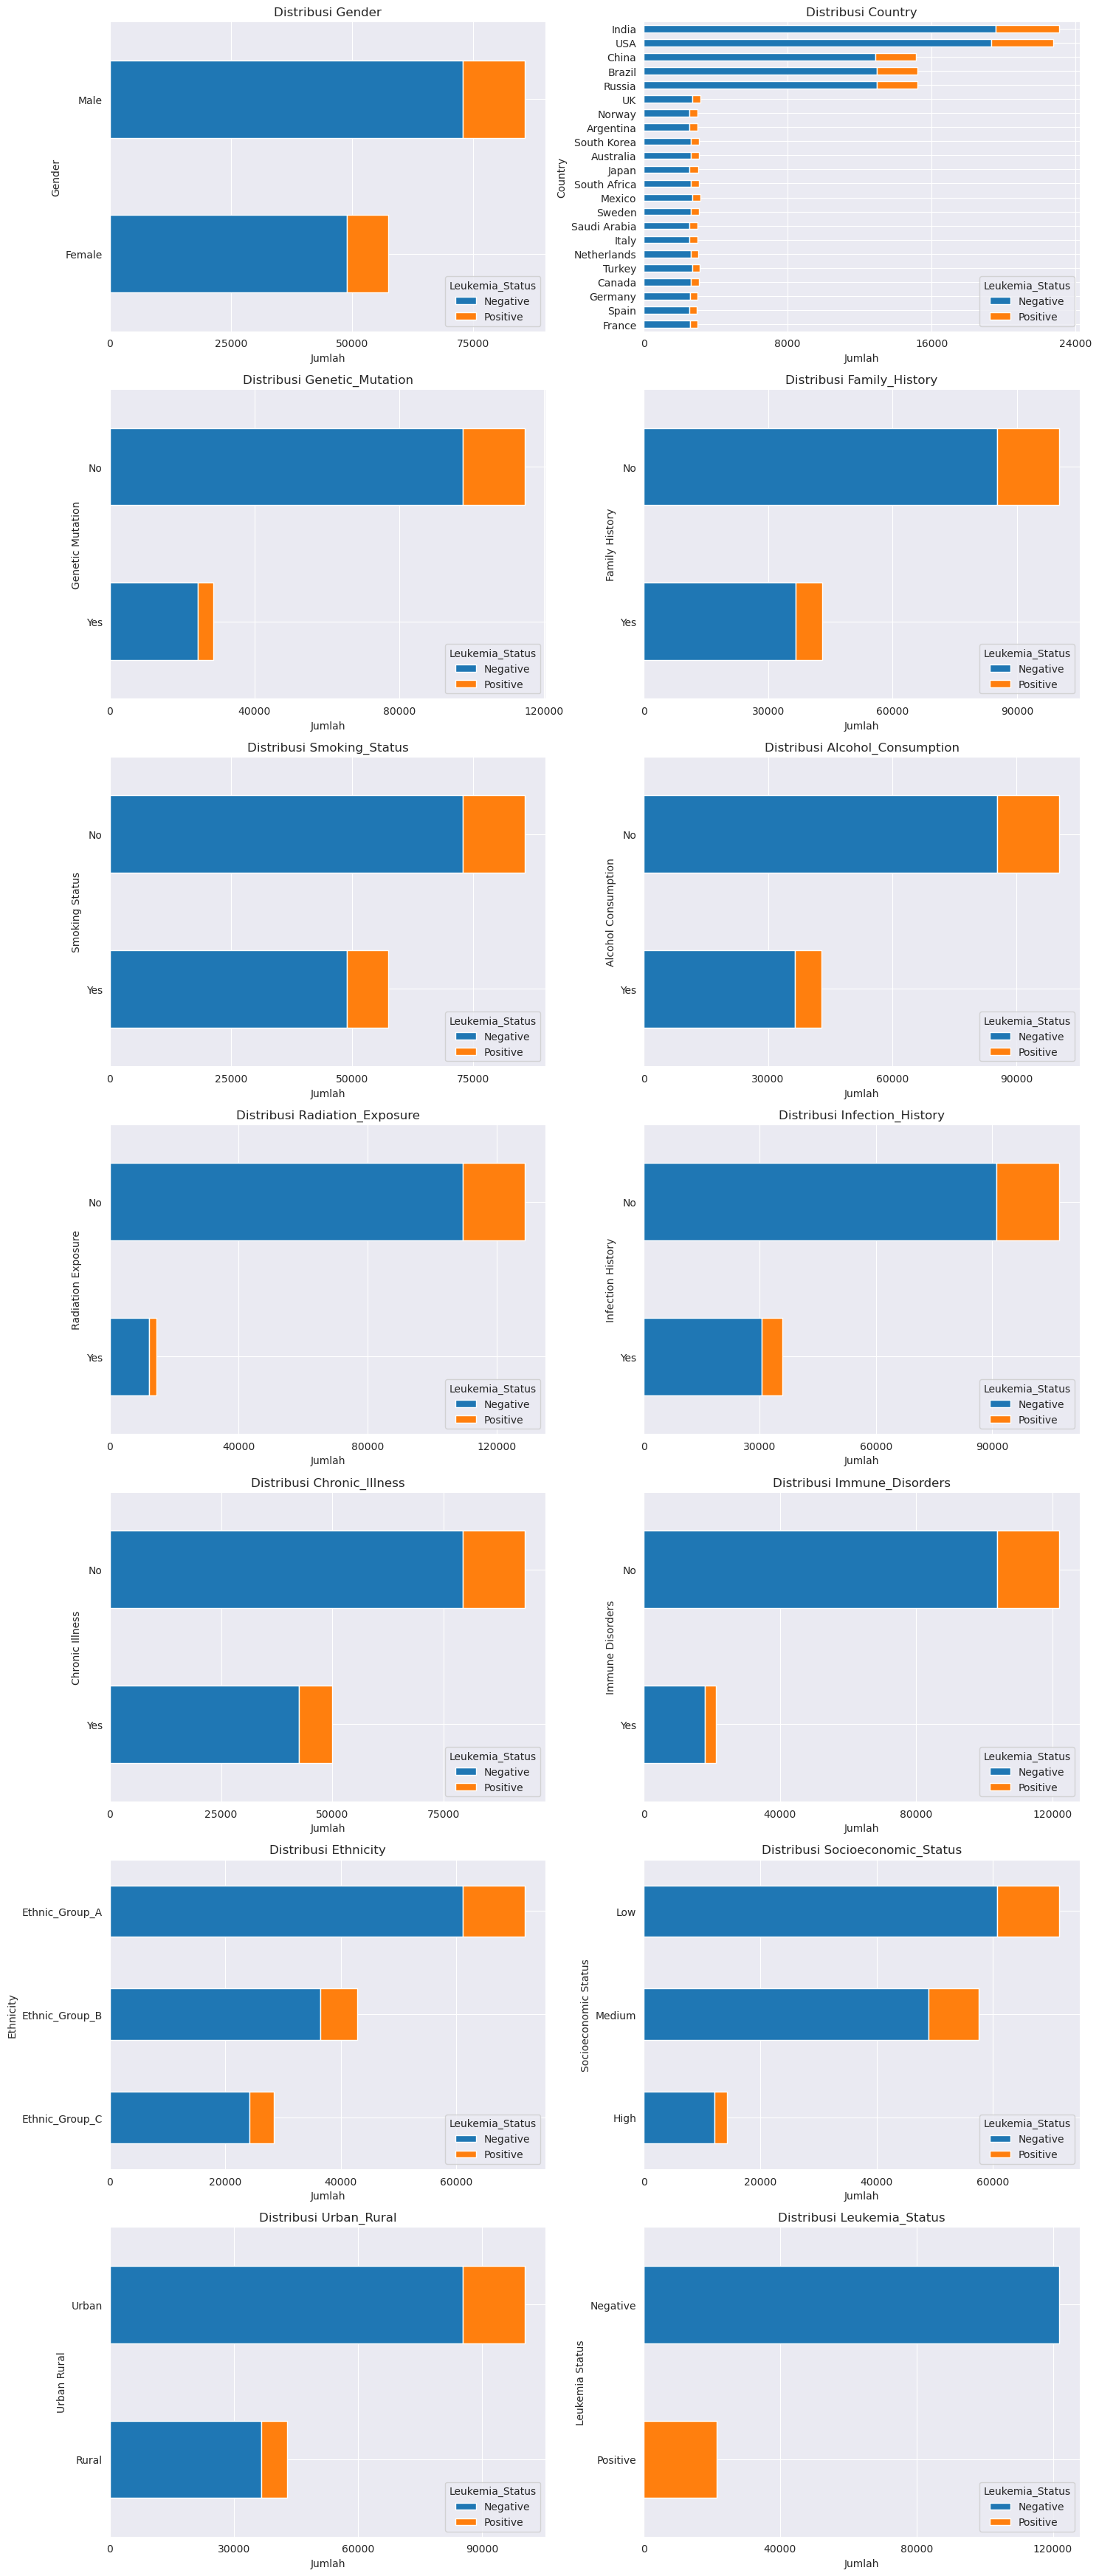

In [16]:
n_plots = len(column_categorical)
n_cols = 2 
n_rows = (n_plots + n_cols - 1) // n_cols 

# Make subplots & flatten axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Iterate & make histogram
for i, column in enumerate(column_categorical):
    ax = axes[i]
    
    data = df.groupby([column, 'Leukemia_Status']).size().unstack().sort_values(by='Positive',ascending=True)
    
    data.plot(kind='barh', stacked=True, ax=ax)
    # sns.countplot(data=df[column], x=df[column], y=df['Leukemia_Status'], ax=ax)

    ax.set_title(f"Distribusi {column}")
    ax.set_xlabel("Jumlah")
    ax.set_ylabel(f"{column.replace('_', ' ').title()}")
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.tick_params(axis='x', rotation=0)

# Hide empty subplot 
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Key Takeaways from Stacked Bar Chart Surgery:

---

- **THE FOLLOWING CATEGORIES FACTORS ARE LIKELY TO BE ASSOCIATED WITH LEUKEMIA STATUS (NEED FURTHER STATISTICAL CONFIRMATION)**:
     `Smoking_Status`, `Family_History`, `Genetic_Mutation`, and (POSSIBLE) `Ethnicity`, (POSSIBLE) `Socioeconomic_Status` (need statistical significance check).

- **CATEGORICAL FACTORS THAT MAY NOT BE SIGNIFICANTLY ASSOCIATED WITH LEUKEMIA STATUS**: 
    `Gender`, `Country`, `Urban_Rural`. (Insights from this bivariate visualization confirm previous univariate insights).

- **THE DATASET IS SUITABLE FOR RISK FACTOR ANALYSIS**: 
    The variation in category distribution between leukemia status groups (although not always visually significant) opens up opportunities for further risk factor analysis.

**OVERALL SUMMARY: DESCRIPTIVE ANALYSIS & VISUALIZATION OF LEUKEMIA BASELINE DATA**

---

Chapter 1 has a main objective to understand the characteristics of leukemia baseline data by:

- **Descriptive Statistical Analysis**: Calculating basic statistics (mean, median, standard deviation, quartiles, etc.) for numerical columns and frequencies for categorical columns.

- **Initial Data Visualization**: Create different types of visualizations (histogram, boxplot, bar chart, and stacked bar chart) to understand univariate data distribution and initial relationships between variables, especially with Leukemia_Status.

- **Identify Anomalies and Early Interesting Patterns**: Detect potential data anomalies (such as negative values in `WBC_Count`, extreme low `BMI`) and interesting patterns emerging from the visualization (such as differences in the distribution of `WBC_Count` and `Bone_Marrow_Blasts` between leukemia statuses).

---

 **Data Used**:

- **Leukemia dataset** (dataset name needs to be confirmed in the final report).

- **Amount of data**: 143,194 patients.

- **Data columns**: 
    - **Numeric columns**: 
        - `Patient_ID`. 

        - `Age`. 
        
        - `WBC_Count`. 
        
        - `RBC_Count`. 
        
        - `Platelet_Count`. 
        
        - `Hemoglobin_Level`. 
        
        - `Bone_Marrow_Blasts`. 
        
        - `BMI`. 
        
    - **categorical columns**:
        
        - `Gender`. 
        
        - `Country`. 
        
        - `Ethnicity`. 
        
        - `Leukemia_Status`. 
        
        - `Smoking_Status`. 
        
        - `Family_History`. 
        
        - `Genetic_Mutation`. 
        
        - `Socioeconomic_Status`. 
        
        - `Urban_Rural`.